### Prepared by:
- Ashish Sharma <accssharma@gmail.com>
- AI Saturdays, Boise
- AI Developers, Boise

# Realization of Convex functions 

Note: `parameter` and `variable` terms are used interchangably.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from  mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10

## Convex Function Example

In [4]:
def paraobla(inp):
    return inp**2 - 4 * inp + 6

In [5]:
x = np.linspace(-10,15, 500)
y = paraobla(x)
assert len(x) == len(y)

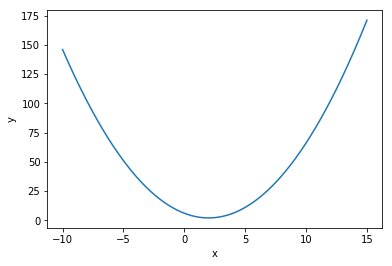

In [6]:
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

- *Only if we colud represent every training algorithm as parabola (as in purely convex)!* (>_<)
    - And the idea is to find a function, that is convex (most of the times!) - so that we could get the global optimum values of the variables of interest! 

## Non-convex function

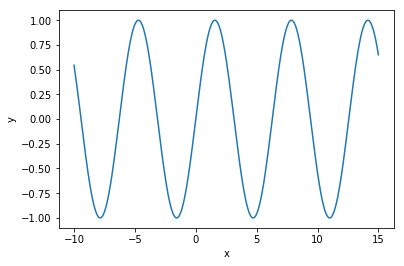

In [7]:
# note sine function is neither convex nor concave function
plt.figure()
plt.plot(x, np.sin(x))
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## (Practice) Minimizing a function using Gradient Descend

In [8]:
# main function (analogous to a loss function in Machine Learning)
def f_theta(theta):
    return (theta[0] - 5) ** 2 + (theta[1] - 5) ** 2

# function that returns partial derivatives of the function for each parameter
def f_theta_prime(theta):
    return 2 * (theta - 5)

In [21]:
# intuitively, this should result 0, just replace the values of theta0 and theta1, and see the output of the function
f_theta(np.array([5,5]))

0

In [19]:
# intuitively, both the gradients should also be 0
# why? because 5,5 are the values of theta0 and theta1 respectively that gives the MINIMUM value of the function f
f_theta_prime(np.array([5,5]))

array([0, 0])

In [22]:
def minimize_j_grad_descent(lr=0.01, num_iter=100, theta_est=np.zeros((2,1))):
    """Minimize a function using gradient descent updates, iteratively"""
    thetas = []
    fun_vals = []
    thetas.append(theta_est)
    fun_vals.append(f_theta(theta_est))
    
    for i in range(1,num_iter):
        # Step1: compute gradient
        grads = f_theta_prime(theta_est)
        # Step2: nudge the parameter values just a little bit to move towards minimas
        # i.e. update the values of thetas
        theta_est = theta_est - lr * grads
        # store values for plotting later
        thetas.append(theta_est)
        fun_vals.append(f_theta(theta_est))
        
    return np.array(thetas), np.array(fun_vals)

In [27]:
# run optimization
num_iter = 1000
# we ALWAYS start with some initial values of parameters to search the parameters that minimize the
# function in the parameter space
theta_init = np.array([20,20])
vls, fn = minimize_j_grad_descent(lr = 0.01, num_iter=num_iter, theta_est=theta_init)

In [28]:
# get traversed values of two variables during optimization for plotting
xx = vls[:,0]
yy = vls[:,1]

In [29]:
print ("optimized values", vls[-1])

optimized values [5.00000003 5.00000003]


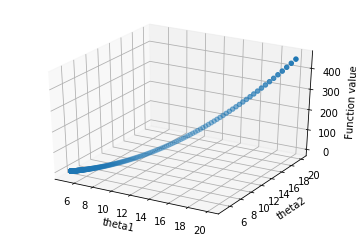

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xx, yy, fn)
ax.set_xlabel('theta1')
ax.set_ylabel('theta2')
ax.set_zlabel('Function value')
plt.show()

## Convex Loss Functions

- Sum of Squares of model residuals
    - Ordinary Least Squres in Linear Regression
- Log loss
    - Binary classification in Logistic Regression and Support Vector Machines
- Cross entroy
    - Multi-class classification
    - Popular with deep neural networks